In [3]:
!pip install matplotlib numpy pandas 
!pip install ipykernel IPython ipywidgets
!pip install plotly pyvista
!pip install jupyterlab_widgets
# !pip install --upgrade IPython
# !pip install ipympl # or conda install -c conda-forge ipympl

import IPython
print(IPython.__version__) # Check if IPython is installed

# %matplotlib inline
%matplotlib notebook
# %matplotlib wedget

9.6.0


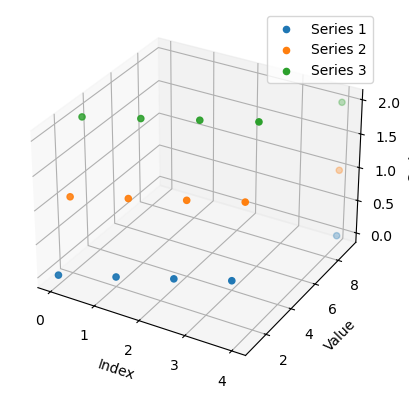

In [6]:
# chatbot.app


import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data: multiple pandas Series
series1 = pd.Series([1, 2, 3, 4, 9])
series2 = pd.Series([2, 3, 4, 5, 9])
series3 = pd.Series([3, 4, 5, 6, 9])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each Series as a separate 2D scatter in 3D space
ax.scatter(series1.index, series1.values, zs=0, zdir='z', label='Series 1')
ax.scatter(series2.index, series2.values, zs=1, zdir='z', label='Series 2')
ax.scatter(series3.index, series3.values, zs=2, zdir='z', label='Series 3')

ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_zlabel('Series')

ax.legend()
plt.show()


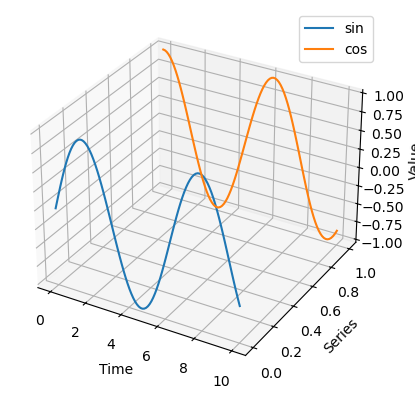

FloatSlider(value=30.0, description='Elevation', max=90.0, step=1.0)

FloatSlider(value=30.0, description='Azimuth', max=90.0, min=-90.0, step=1.0)

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Generate example data
t = np.linspace(0, 10, 100)
series1 = pd.Series(np.sin(t), name="sin")
series2 = pd.Series(np.cos(t), name="cos")

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.plot(t, series1, zs=0, zdir='y', label=series1.name)
ax.plot(t, series2, zs=1, zdir='y', label=series2.name)
ax.set_xlabel('Time')
ax.set_ylabel('Series')
ax.set_zlabel('Value')

# Add legend
ax.legend()

# Function to update the view
def update_view(elev=30, azim=30):
    ax.view_init(elev=elev, azim=azim)
    plt.draw()

# Interactive widgets
elev_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description="Elevation")
azim_slider = widgets.FloatSlider(min=-90, max=90, step=1, value=30, description="Azimuth")

widgets.interactive(update_view, elev=elev_slider, azim=azim_slider)

# Display the sliders and plot
display(elev_slider, azim_slider)
plt.show()


/tmp/ipykernel_49889/2734787269.py:62: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


(<Figure size 900x600 with 1 Axes>,
 <Axes3D: title={'center': 'Multiple pandas Series in 3D'}, xlabel='Date', ylabel='Value', zlabel='Series'>)

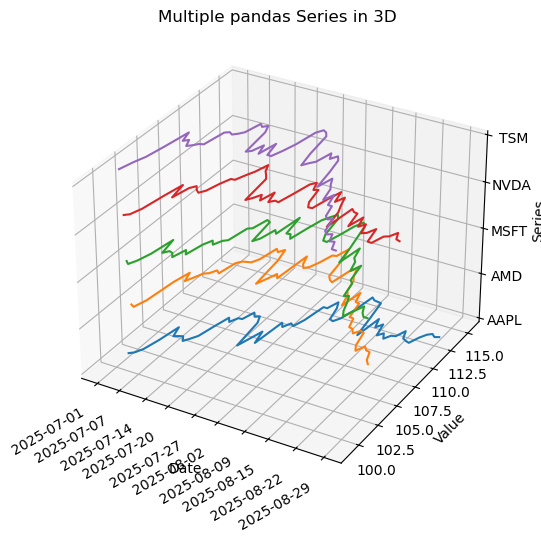

In [7]:
# If using Notebook:
# %matplotlib notebook
# If using JupyterLab (after pip install ipympl):
# %matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D
from datetime import datetime

def plot_3d_series(series_list, z_labels=None, title="3D Lines: multiple pandas Series"):
    """
    Plot multiple pandas Series in 3D.
      X = datetime index (converted to ordinal)
      Y = series values
      Z = one track per series (0,1,2,...), or custom labels

    series_list: list[pd.Series] with DateTimeIndex
    z_labels: optional list same length as series_list; strings shown on Z ticks
    """
    if z_labels is None:
        z_vals = list(range(len(series_list)))
        z_ticklabels = [str(i) for i in z_vals]
    else:
        # If any label is non-numeric, place on 0..N-1 but keep string ticks
        if all(isinstance(z, (int, float, np.integer, np.floating)) for z in z_labels):
            z_vals = list(z_labels)
            z_ticklabels = [str(z) for z in z_labels]
        else:
            z_vals = list(range(len(series_list)))
            z_ticklabels = [str(z) for z in z_labels]

    # Union of all datetime indices; align (NaNs allowed)
    all_index = pd.DatetimeIndex(sorted(set().union(*[s.index for s in series_list])))
    aligned = [s.reindex(all_index).astype(float) for s in series_list]

    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection="3d")

    # Plot each series at its Z offset
    for z, s in zip(z_vals, aligned):
        x_ord = s.index.map(pd.Timestamp.toordinal).to_numpy()
        y_val = s.to_numpy()
        ax.plot(x_ord, y_val, zs=z)

    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.set_zlabel("Series")

    # Nice date ticks
    x_min = min(s.index.map(pd.Timestamp.toordinal).min() for s in aligned)
    x_max = max(s.index.map(pd.Timestamp.toordinal).max() for s in aligned)
    xticks_ord = np.linspace(x_min, x_max, num=min(10, len(all_index))).astype(int)
    ax.set_xticks(xticks_ord)
    ax.set_xticklabels([datetime.fromordinal(int(v)).date() for v in xticks_ord], rotation=30, ha="right")

    ax.set_zticks(z_vals)
    ax.set_zticklabels(z_ticklabels)

    fig.tight_layout()
    return fig, ax

# --- Example with 5 Series over 60 days ---
rng = pd.date_range("2025-07-01", periods=60, freq="D")
np.random.seed(0)
base = np.cumsum(np.random.randn(len(rng))) + 100

names = ["AAPL", "AMD", "MSFT", "NVDA", "TSM"]
drifts = [0.05, -0.03, 0.02, 0.07, 0.03]
series_list = []
for name, drift in zip(names, drifts):
    noise = np.cumsum(np.random.randn(len(rng))) * 0.5
    s = pd.Series(base + drift * np.arange(len(rng)) + noise, index=rng, name=name)
    series_list.append(s)

plot_3d_series(series_list, z_labels=names, title="Multiple pandas Series in 3D")


In [12]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

def plot_zoom(zoom=1.0):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(xticks_ord, y_val, zs=0)   # <-- replace with your 3D plotting logic
    ax.set_title("Zoomable 3D Chart")
    ax.set_box_aspect([1,1,1])  # keep aspect ratio
    ax.set_xlim(x_ord.min()/zoom, x_ord.max()/zoom)
    ax.set_ylim(y_val.min()/zoom, y_val.max()/zoom)
    plt.show()

interact(plot_zoom, zoom=widgets.FloatSlider(value=1, min=0.5, max=5, step=0.1))


interactive(children=(FloatSlider(value=1.0, description='zoom', max=5.0, min=0.5), Output()), _dom_classes=('…

<function __main__.plot_zoom(zoom=1.0)>

In [13]:
import plotly.graph_objs as go
import numpy as np

# Generate data
t = np.linspace(0, 10, 100)
y1 = np.sin(t)
y2 = np.cos(t)

# Create traces
trace1 = go.Scatter3d(x=t, y=np.zeros_like(t), z=y1, mode='lines', name='sin(t)')
trace2 = go.Scatter3d(x=t, y=np.ones_like(t), z=y2, mode='lines', name='cos(t)')

# Create figure
fig = go.Figure(data=[trace1, trace2])
fig.update_layout(scene=dict(
                    xaxis_title='Time',
                    yaxis_title='Series',
                    zaxis_title='Value'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

# Show figure with interactive zoom
fig.show()


/home/raul/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


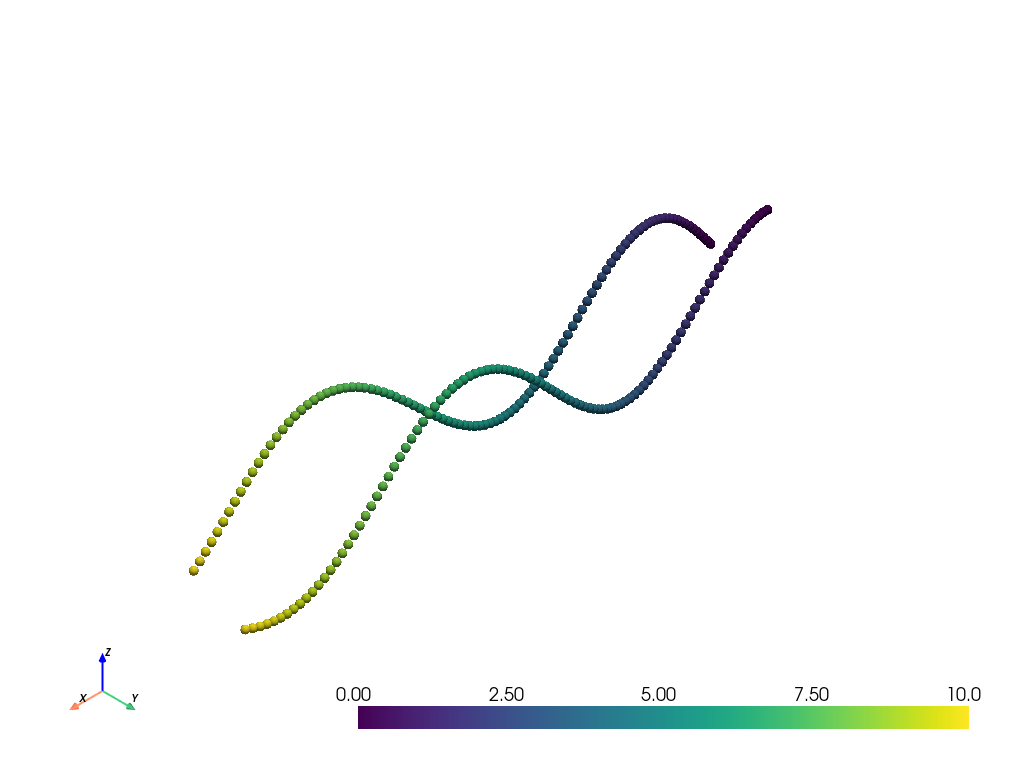

In [4]:
import pyvista as pv
import numpy as np

# Generate data
t = np.linspace(0, 10, 100)
y1 = np.sin(t)
y2 = np.cos(t)

# Create a plotter
plotter = pv.Plotter()

# Add plot
plotter.add_mesh(np.stack((t, np.zeros_like(t), y1)).T, scalars=t, render_points_as_spheres=True, point_size=10)
plotter.add_mesh(np.stack((t, np.ones_like(t), y2)).T, scalars=t, render_points_as_spheres=True, point_size=10)

# Add axes
plotter.show_axes()

# Show interactive plot
plotter.show()

